Обоснование удаления колонок по весу и росту

In [37]:
import pandas as pd
from dython.nominal import associations
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("data/norm_data.csv")

df.head()

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,...,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,22.0,NaN,...,0.26,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40.0,NaN,...,0.12,NaN,NaN,0.0,0.0,NaN,NaN,NaN,84.0,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,42.0,NaN,...,0.08,NaN,NaN,0.0,0.0,NaN,NaN,NaN,32.8,0
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,...,27.16,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46.0,NaN,...,63.83,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0


In [39]:
df_h = df[['height', 'comfort_rating']].dropna()
df_w = df[['weight', 'comfort_rating']].dropna()
df_hw = df[['height', 'weight', 'comfort_rating']].dropna()

df_h.shape, df_w.shape, df_hw.shape

((143, 2), (143, 2), (143, 3))

In [40]:
sum(df_h['height'] != df_hw['height'])

0

In [41]:
sum(df_w['weight'] != df_hw['weight'])

0

=> пропуски в росте и весе встречаются одновременно

Помимо зависимости комфрота от роста и веса в отдельности, стоит проверить зависимость комфорта от [ИМТ (вес / рост^2)](https://gkb81.ru/sovety/kalkulyator-imt/)

In [42]:
df = df.dropna(subset=['height', 'weight', 'comfort_rating'])

In [43]:
df.shape

(143, 30)

In [47]:
df['IMT'] = df['weight'] / df['height'] ** 2 * 1e4

df[['height', 'weight', 'IMT']].head()

,height,weight,IMT
270,167.6,65.0,23.140105
272,162.6,53.0,20.046326
273,167.6,75.0,26.700121
275,160.0,70.0,27.343750
277,152.4,57.0,24.541716


In [49]:
df['IMT'].describe()

count      143.000000
mean       276.662493
std       2143.142524
min         16.764296
25%         21.653681
50%         23.734404
75%         26.203074
max      20107.557151
Name: IMT, dtype: float64

20107 аномальное значение, т.к даже при весе в 255кг и росте в 60 см, ИМТ = 708.3

In [50]:
df = df[df['IMT'] < 500]

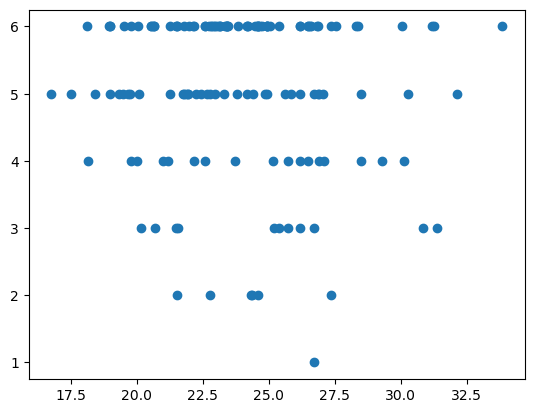

In [52]:
plt.scatter(df['IMT'], df['comfort_rating'])
plt.show()

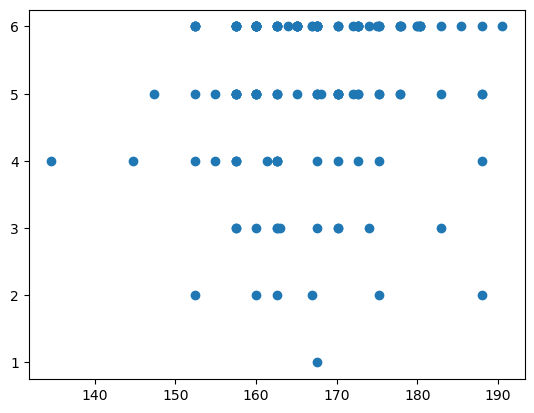

In [53]:
plt.scatter(df['height'], df['comfort_rating'])

plt.show()

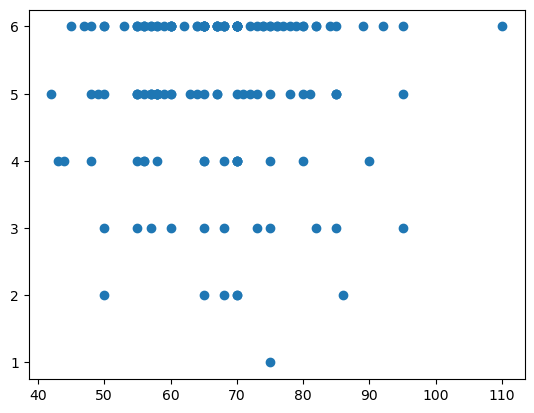

In [54]:
plt.scatter(df['weight'], df['comfort_rating'])

plt.show()

Как можно заметить, в каждой оценке присутствуют почти все категории веса, роста и ИМТ